In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np 


In [2]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x=(i-i.min()) / (i.max()-i.min())
    return(x)

In [4]:
def_norm = norm_func(crime.iloc[:,1:])

In [5]:
def_norm.head(10)     # top 10 rows

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


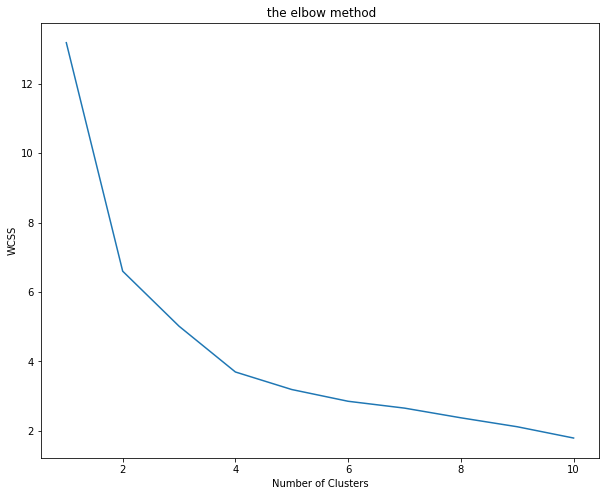

In [6]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10,8))
WCSS = []
for i in range (1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(def_norm)
    WCSS.append(clf.inertia_) # iner5tia is another name of WCSS
plt.plot(range(1,11),WCSS) 
plt.title(' the elbow method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [7]:
clf = KMeans(n_clusters=5)
y_Kmeans = clf.fit_predict(def_norm)

In [8]:
y_Kmeans
clf.labels_

array([1, 3, 3, 2, 3, 3, 4, 4, 3, 1, 4, 0, 3, 2, 0, 2, 2, 1, 0, 3, 4, 3,
       0, 1, 2, 2, 2, 3, 0, 4, 3, 3, 1, 0, 2, 2, 2, 2, 4, 1, 0, 1, 3, 4,
       0, 2, 2, 0, 0, 2])

In [9]:

y_Kmeans

array([1, 3, 3, 2, 3, 3, 4, 4, 3, 1, 4, 0, 3, 2, 0, 2, 2, 1, 0, 3, 4, 3,
       0, 1, 2, 2, 2, 3, 0, 4, 3, 3, 1, 0, 2, 2, 2, 2, 4, 1, 0, 1, 3, 4,
       0, 2, 2, 0, 0, 2])

In [10]:
clf.cluster_centers_

array([[0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.36230637, 0.31409002, 0.54237288, 0.33554817],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.23493976, 0.33317025, 0.84503632, 0.22997416]])

In [11]:
clf.inertia_

3.214671780209886

In [12]:
md = pd.Series(y_Kmeans)
crime['clust']=md
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [13]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,2.680000,70.100000,51.000000,10.910000,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,6.814286,136.714286,64.000000,20.285714,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0
4,4.700000,142.285714,81.857143,16.200000,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

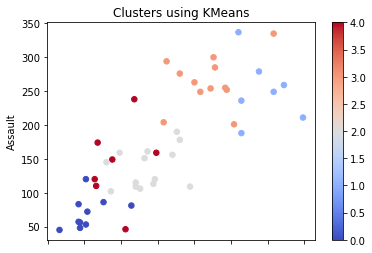

In [14]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

Text(0.5, 1.0, 'Clusters using KMeans')

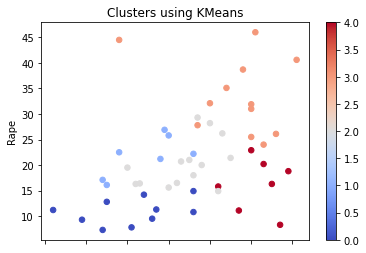

In [15]:
crime.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [16]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.690820410392112,
 3.185021932472434,
 2.8464646100876654,
 2.649126401546754,
 2.3700336826966693,
 2.1121168318096624,
 1.786721044288095]

# @######dbscan

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("crime_data.csv")
print(df.head())
df

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [20]:
df1 = df.drop(['Unnamed: 0'],axis=1)

In [21]:
array=df1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [22]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [23]:
dbscan = DBSCAN(eps=0.485, min_samples=10)
dbscan.fit(x)

DBSCAN(eps=0.485, min_samples=10)

In [24]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [25]:
c1=pd.DataFrame(dbscan.labels_,columns=['clusters'])


In [26]:
c1
pd.set_option("display.max_rows",None)

In [27]:
c1

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [28]:
df1 = pd.concat([df,c1],axis=1)
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [29]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'clusters using dbscan')

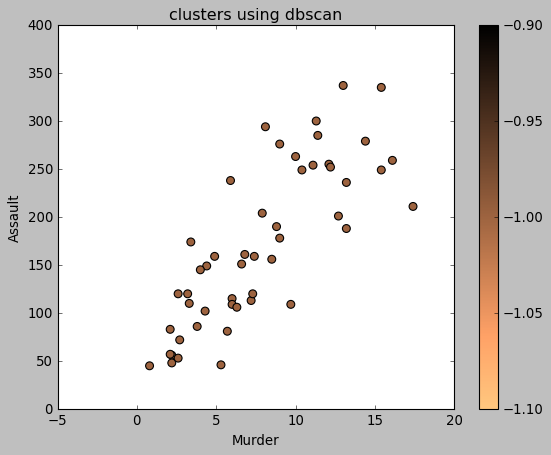

In [30]:
df1.plot(x="Murder", y="Assault",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("clusters using dbscan")

Text(0.5, 1.0, 'clusters using dbscan')

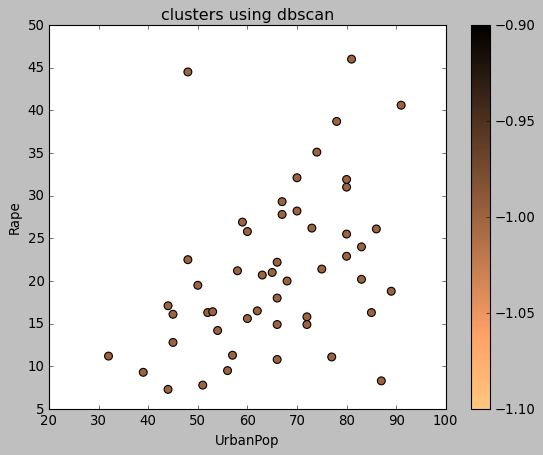

In [31]:
df1.plot(x="UrbanPop", y="Rape",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("clusters using dbscan")

In [32]:
d1=dbscan.labels_

In [40]:
import sklearn.metrics
sklearn.metrics.silhouette_score(x,c1)   


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [38]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(x)  

In [39]:
y_Kmeans

array([1, 3, 3, 2, 3, 3, 4, 4, 3, 1, 4, 0, 3, 2, 0, 2, 2, 1, 0, 3, 4, 3,
       0, 1, 2, 2, 2, 3, 0, 4, 3, 3, 1, 0, 2, 2, 2, 2, 4, 1, 0, 1, 3, 4,
       0, 2, 2, 0, 0, 2])

In [42]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,4
1,1
2,1
3,3
4,1
5,1
6,0
7,0
8,1
9,4


In [43]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,Kcluster
0,Alabama,13.2,236,58,21.2,-1,4
1,Alaska,10.0,263,48,44.5,-1,1
2,Arizona,8.1,294,80,31.0,-1,1
3,Arkansas,8.8,190,50,19.5,-1,3
4,California,9.0,276,91,40.6,-1,1
5,Colorado,7.9,204,78,38.7,-1,1
6,Connecticut,3.3,110,77,11.1,-1,0
7,Delaware,5.9,238,72,15.8,-1,0
8,Florida,15.4,335,80,31.9,-1,1
9,Georgia,17.4,211,60,25.8,-1,4


Text(0.5, 1.0, 'Clusters using KMeans')

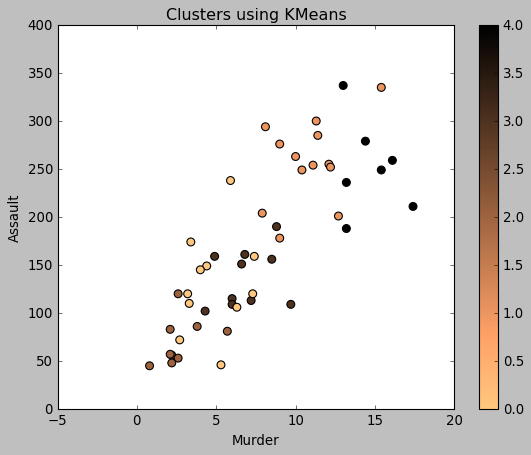

In [44]:
df2.plot(x="Murder",y ="Assault",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [45]:
sklearn.metrics.silhouette_score(x, y_kmeans)

0.29318614501452006

In [46]:
from sklearn.neighbors import NearestNeighbors  

In [47]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)  

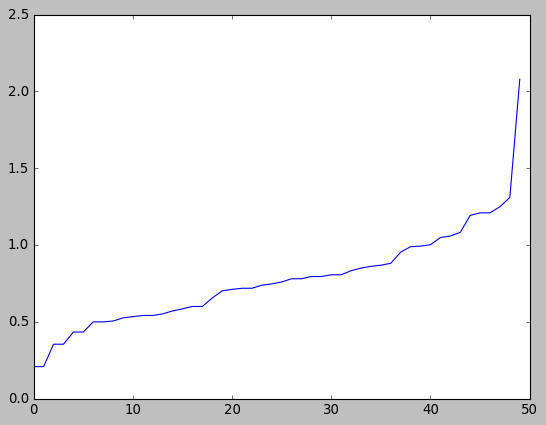

In [48]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

# hierrarchical clustering

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
crime = pd.read_csv("crime_data.csv")

In [50]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [51]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [52]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [53]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


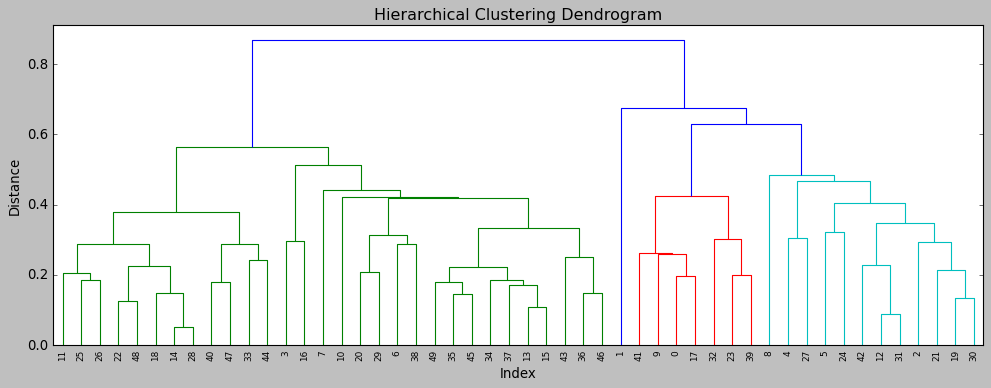

In [54]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [55]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [56]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [57]:
data = crime[(crime.clust==1)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [58]:
data = crime[(crime.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:7]))
crime_subset    

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,0.820928
1,0.513019,1.118060,-1.224067,2.509424,0.208295
2,0.072361,1.493817,1.009122,1.053466,-0.404338
3,0.234708,0.233212,-1.084492,-0.186794,-1.016971
4,0.281093,1.275635,1.776781,2.088814,-0.404338
5,0.025976,0.402909,0.869548,1.883901,-0.404338
6,-1.040880,-0.736484,0.799761,-1.092723,-1.016971
7,-0.437875,0.815030,0.450825,-0.585834,-1.016971
8,1.765415,1.990786,1.009122,1.150530,-0.404338
9,2.229265,0.487757,-0.386621,0.492653,0.820928


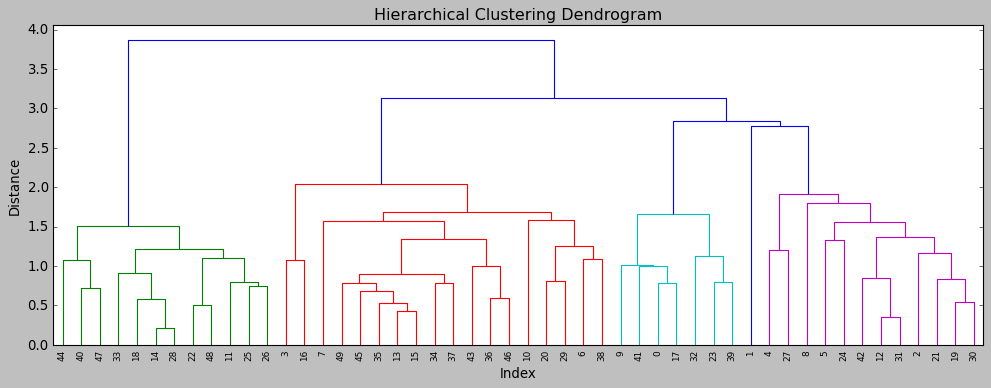

In [60]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()       

In [61]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(crime_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime   

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [62]:
crime.iloc[:,1:].groupby(crime.clust).mean()


,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,10.883333,256.916667,78.333333,32.250000,2.0
3,3.091667,76.000000,52.083333,11.833333,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [63]:
data = crime[(crime.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


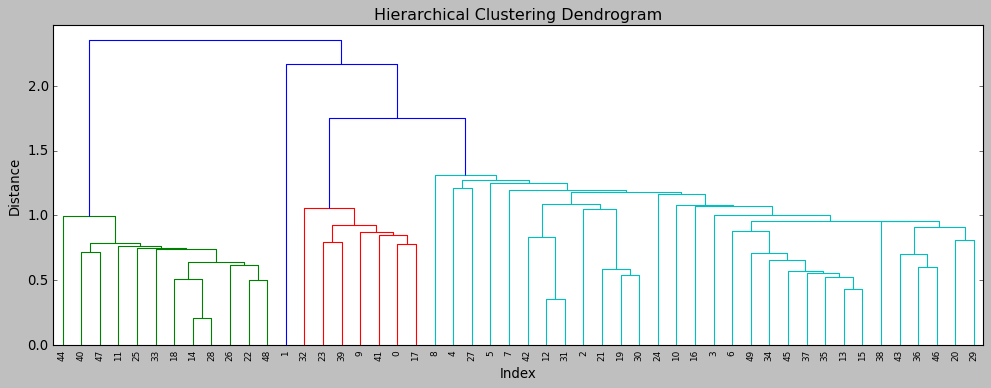

In [64]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [65]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(crime_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,1


In [66]:
data = crime[(crime.clust==2)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2
